In [41]:
import numpy as np
import pandas as pd
from seaborn import regplot
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [42]:
df = pd.read_csv("Downloads/steam.csv/steam.csv")
df.shape
df.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


### Almost the same prerpocessing as for our primary goal

In [43]:
df.english = df.english.astype('object')
df.required_age = df.required_age.astype('object')
X = df.drop(['appid','owners','name','developer','publisher','average_playtime','median_playtime'],axis=1)
X['positive_percentage'] = df.positive_ratings/(df.positive_ratings+df.negative_ratings) 


print(X.dtypes)
X.head(3)

release_date            object
english                 object
platforms               object
required_age            object
categories              object
genres                  object
steamspy_tags           object
achievements             int64
positive_ratings         int64
negative_ratings         int64
price                  float64
positive_percentage    float64
dtype: object


,release_date,english,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,price,positive_percentage
0,2000-11-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,7.19,0.973888
1,1999-04-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,3.99,0.839787
2,2003-05-01,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,3.99,0.895648


In [44]:
pd.qcut?

In [45]:
# X_number = X.select_dtypes(exclude='object')
# X_number.head(3)

In [46]:
X_number = X.select_dtypes(exclude='object')
X_category = X.select_dtypes(include='object')
for k in X_category.columns:
    X_category[k] = X_category[k].astype('category')

X_category.head(3)


C:\Users\lid2\AppData\Local\Temp/ipykernel_26708/3844588468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category[k] = X_category[k].astype('category')


,release_date,english,platforms,required_age,categories,genres,steamspy_tags
0,2000-11-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
1,1999-04-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
2,2003-05-01,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer


In [47]:
print(X_category.shape)
print(X_category.dtypes)

(27075, 7)
release_date     category
english          category
platforms        category
required_age     category
categories       category
genres           category
steamspy_tags    category
dtype: object


In [48]:
engDummy = pd.get_dummies(X_category.iloc[:,[1,3]]) 
engDummy.head(3)

,english_0,english_1,required_age_0,required_age_3,required_age_7,required_age_12,required_age_16,required_age_18
0,0,1,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0


In [49]:
X_category['release_date'] = X_category['release_date'].astype('datetime64')

C:\Users\lid2\AppData\Local\Temp/ipykernel_26708/2091268990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category['release_date'] = X_category['release_date'].astype('datetime64')


In [50]:
print(X_category.shape)

(27075, 7)


In [51]:
X_category['release_date'].sort_values(ascending=True)

2685    1997-06-30
6       1998-11-08
1       1999-04-01
4       1999-11-01
0       2000-11-01
           ...    
27060   2019-04-25
26695   2019-04-25
22522   2019-04-25
24430   2019-04-26
23726   2019-05-01
Name: release_date, Length: 27075, dtype: datetime64[ns]

In [52]:
X_category['release_date']  = (X_category['release_date'] - pd.to_datetime('1997-06-30')).dt.total_seconds()/86400

C:\Users\lid2\AppData\Local\Temp/ipykernel_26708/4294704439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_category['release_date']  = (X_category['release_date'] - pd.to_datetime('1997-06-30')).dt.total_seconds()/86400


In [53]:
X_category.head(3)

,release_date,english,platforms,required_age,categories,genres,steamspy_tags
0,1220.0,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
1,640.0,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
2,2131.0,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer


In [54]:
platDummy = X_category['platforms'].str.get_dummies(sep=';')

In [55]:
cateDummy = X_category['categories'].str.get_dummies(sep=';')

In [56]:
genDummy = X_category['genres'].str.get_dummies(sep=';')

In [57]:
tagDummy = X_category['steamspy_tags'].str.get_dummies(sep=';').add_prefix('tag_')

In [58]:
X_number = pd.concat([X_category.release_date,X_number],axis=1)
stnd = StandardScaler()
stnd.fit(X_number)
X_number = pd.DataFrame(stnd.transform(X_number),
                                columns=X_number.columns)
X_number.head(3)

,release_date,achievements,positive_ratings,negative_ratings,price,positive_percentage
0,-7.584710,-0.128306,6.505741,0.730006,0.141186,1.110537
1,-8.329745,-0.128306,0.122045,0.098480,-0.265175,0.536451
2,-6.414491,-0.128306,0.127206,0.043636,-0.265175,0.775589


In [59]:
X_category = pd.concat([engDummy,platDummy,cateDummy,genDummy,tagDummy],axis=1)

In [60]:
X_category.head(3)

,english_0,english_1,required_age_0,required_age_3,required_age_7,required_age_12,required_age_16,required_age_18,linux,mac,...,tag_Warhammer 40K,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports
0,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [61]:
df.owners=df.owners.astype("string")
owners=df.owners.str.split("-")

result=[]
for i in range(len(owners)):
    low=int(owners[i][0])
    high=int(owners[i][1])
    result.append(high)

df["Owners"]=result

df["popularity"]=pd.cut(df["Owners"],bins=[0,20000,100000, 200000000], labels=["Low popularity","Average", "Popular"])
df["popularity"].value_counts()

df["popularity"].isna().value_counts()

False    27075
Name: popularity, dtype: int64

In [62]:
X = pd.concat([X_number,X_category,df.popularity],axis=1)
X.rename(columns = {'release_date':'day_elapse'}, inplace = True)
print(X.shape)
X.head(3)

(27075, 415)


,day_elapse,achievements,positive_ratings,negative_ratings,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports,popularity
0,-7.584710,-0.128306,6.505741,0.730006,0.141186,1.110537,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Popular
1,-8.329745,-0.128306,0.122045,0.098480,-0.265175,0.536451,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Popular
2,-6.414491,-0.128306,0.127206,0.043636,-0.265175,0.775589,0,1,1,0,...,0,0,0,0,0,1,0,0,0,Popular


In [63]:
X=X.drop('popularity',axis=1)
X['median_playtime'] = df.median_playtime
df = X
print(df.dtypes)
# df.addictiveness.
df.head(3)

day_elapse          float64
achievements        float64
positive_ratings    float64
negative_ratings    float64
price               float64
                     ...   
tag_World War II      int64
tag_Wrestling         int64
tag_Zombies           int64
tag_e-sports          int64
median_playtime       int64
Length: 415, dtype: object


,day_elapse,achievements,positive_ratings,negative_ratings,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,tag_Web Publishing,tag_Werewolves,tag_Western,tag_Word Game,tag_World War I,tag_World War II,tag_Wrestling,tag_Zombies,tag_e-sports,median_playtime
0,-7.584710,-0.128306,6.505741,0.730006,0.141186,1.110537,0,1,1,0,...,0,0,0,0,0,0,0,0,0,317
1,-8.329745,-0.128306,0.122045,0.098480,-0.265175,0.536451,0,1,1,0,...,0,0,0,0,0,0,0,0,0,62
2,-6.414491,-0.128306,0.127206,0.043636,-0.265175,0.775589,0,1,1,0,...,0,0,0,0,0,1,0,0,0,34


In [64]:
#train test split
(df_train,df_test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [66]:
X_train = df_train.drop('median_playtime', axis = 1)
y_train = df_train['median_playtime']
X_test = df_test.drop('median_playtime', axis = 1)
y_test = df_test['median_playtime']


         best B = {'n_estimators': 120}
  validation R2 = -0.176


<AxesSubplot:xlabel='trees'>

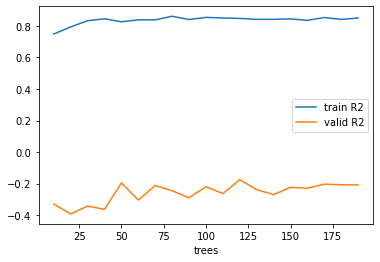

In [67]:
#Using gridsearchCV
B = np.arange(10,200,10)
grid = {'n_estimators':B}

rf = RandomForestRegressor()
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='trees',y='train R2')
results.plot.line(x='trees',y='valid R2',ax=ax1)


         best B = {'n_estimators': 120}
  validation R2 = -0.204


<AxesSubplot:xlabel='trees'>

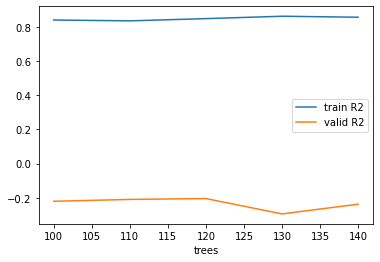

In [68]:
#Refine resolution
B = np.arange(100,150,10)
grid = {'n_estimators':B}

rf = RandomForestRegressor()
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='trees',y='train R2')
results.plot.line(x='trees',y='valid R2',ax=ax1)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
#Try using linearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
cvResults = cross_validate(lr,X_train,y_train,n_jobs=-1,return_train_score=True)
training_score = cvResults['train_score'].mean()
validation_score = cvResults['test_score'].mean()
print('Linear Estimator')
print('      training score:',training_score)
print('    validation score:',validation_score)

Linear Estimator
      training score: 0.03149086318737042
    validation score: -2.6143996976543725e+17


KeyboardInterrupt: 

AttributeError: 'KNeighborsRegressor' object has no attribute 'best_score_'